In [1]:
import matplotlib.pyplot as plt
import pandas as pd

  
def onehot(x):
    return (2**(x-1)) if x != 0 else 0

#compares neurons outputs
def comparator(a):
    df= pd.DataFrame(a)
    amax = df.max(axis=0)
    aidx = df.idxmax(axis=0)
    c = []
    for i in range(len(aidx)):
        c.append(onehot(aidx[i]+1) if amax[i]!=0 else 0)
    return c

#flattens timestamps and removes duplicates
def flatten_ts(_2d_list):
    if not isinstance(_2d_list, list):
        return [_2d_list]  
    _1d_list = []
    seen = set()
    for i in _2d_list:
        if isinstance(i, list):
            for j in i:
                if j not in seen:
                    seen.add(j)
                    _1d_list.append(j)
        else:
            if i not in seen:
                seen.add(i)
                _1d_list.append(i)
    
    _1d_list.sort()
    return _1d_list

#generates an output spike if input spike exist
def layer_output_spike(input_spike, output_vector, neuron_num):
    time_stamp = [[] for _ in range(neuron_num)]
    ints = flatten_ts(input_spike)

    for i in ints:
        for j in range(neuron_num):
            if(output_vector[i] == onehot(j+1)):
                time_stamp[j].append(i)
            elif(output_vector[i+1] == onehot(j+1)):
                time_stamp[j].append(i+1)
            elif(output_vector[i+2] == onehot(j+1)):
                time_stamp[j].append(i+2)                
    return time_stamp


class Synapse:
    def __init__(self, w, ts):
        self.w = w
        self.ts = ts
        self.membrane_potential = 0
    
    def update(self, t):
        if t in self.ts:
            self.membrane_potential = self.membrane_potential + self.w*(2**8)
        else:
            self.membrane_potential -= self.w
        
        if self.membrane_potential < 0:
            self.membrane_potential = 0
    
    def run(self, time):
        self.membrane_potential = 0
        output = []
        for t in range(time):
            self.update(t)
            output.append(self.membrane_potential)
        return output
    

class Neuron:
    def __init__(self, n, synapse_weights, synapse_spikes, threshold):
        self.n = n
        self.synapses = []
        for i in range(n):
            self.synapses.append(Synapse(w=synapse_weights[i], ts=synapse_spikes[i]))
        self.threshold = threshold
    
    def update(self):
        sum_result = sum(self.synapses[i].membrane_potential for i in range(self.n))
        if sum_result >= self.threshold:
            return sum_result
        else:
            return 0
    
    def run(self, time):
        output = []
        for t in range(time):
            for i in range(self.n):
                self.synapses[i].update(t)
            output.append(self.update())
        return output


class Layer:
    def __init__(self, neuron_num, neuron_input_num, synapse_weights, synapse_spikes, threshold):
        self.neuron_num =  neuron_num
        self.neurons = [Neuron(neuron_input_num, synapse_weights[i], synapse_spikes, threshold[i]) for i in range(neuron_num)]
    
    def runlayer(self, time):
        output = []
        for t in range(time):
            neuron_outputs = [n.run(t) for n in self.neurons]
        max_output = max(neuron_outputs)
        neuron_index = comparator(neuron_outputs)
        layer_output = max_output 
        output.append(layer_output)
        return output, neuron_index
    

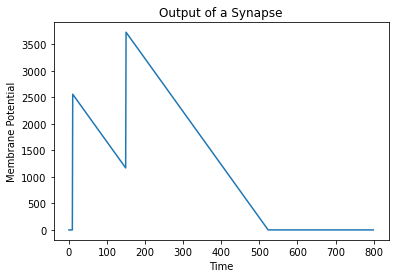

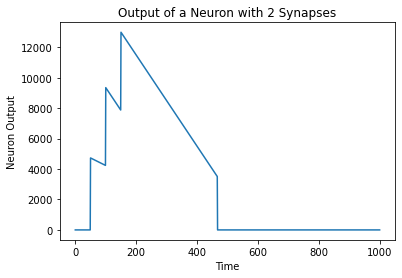

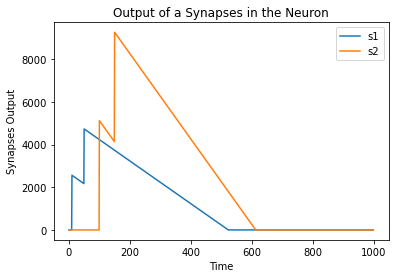

In [5]:
# testing synapse
synapse = Synapse(w=10, ts=[10,150])
output = synapse.run(time=800)
plt.plot(range(800), output)
plt.xlabel('Time')
plt.ylabel('Membrane Potential')
plt.title('Output of a Synapse')
plt.show()

#testing Neuron
synapse_weights = [10, 20]
synapse_spikes = [[10, 50],[100,150]]
th = 3500
neuron = Neuron(n=2, synapse_weights=synapse_weights, synapse_spikes=synapse_spikes, threshold=th)
output = neuron.run(time=1000)
plt.plot(range(1000), output)
plt.xlabel('Time')
plt.ylabel('Neuron Output')
plt.title('Output of a Neuron with 2 Synapses')
plt.show()

#plot synapses output in the Neuron
sy = neuron.synapses
for i in sy:
    plt.plot(i.run(time =1000))

plt.xlabel('Time')
plt.ylabel('Synapses Output')
plt.title('Output of a Synapses in the Neuron')
plt.legend(["s1","s2"])

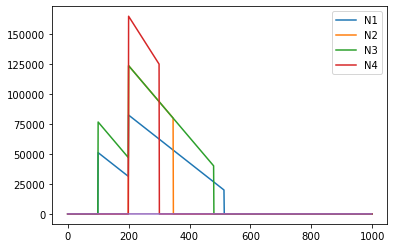

In [6]:
#layer with four neurons each neuron 2 inputs
'''
Construct an ODESA layer with 4 Neurons and 2 Synapses at each Neuron

'''
neuron_num=4
neuron_input_num=2
neuron1_synapse_weights = [100, 100, 100, 100]
neuron1_threshold = 20000
neuron2_synapse_weights = [100, 200, 200, 100]
neuron2_threshold = 80000
neuron3_synapse_weights = [200, 100, 100, 200]
neuron3_threshold = 40000
neuron4_synapse_weights = [200, 200, 200, 200]
neuron4_threshold = 125000
thresholds = [neuron1_threshold, neuron2_threshold, neuron3_threshold, neuron4_threshold]
synapse_weights = [neuron1_synapse_weights, neuron2_synapse_weights, neuron3_synapse_weights, neuron4_synapse_weights]
spike_times = [[100, 200] for _ in range(neuron_input_num)]

# Initialize the layer with two neurons
L2 = Layer(neuron_num=neuron_num, neuron_input_num=neuron_input_num, synapse_weights= synapse_weights, synapse_spikes= spike_times, threshold= thresholds)

# Run the simulation for 1000 time steps
lo = L2.runlayer(time=1000)[0]
neuron_indexes = L2.runlayer(time=1000)[1]
x = layer_output_spike(spike_times, neuron_indexes, neuron_num )

#plot Neurons outputs
for n in L2.neurons:
    plt.plot(range(1000), n.run(time=1000))
plt.xlabel('Time')
plt.ylabel('Neurons Output')
plt.title('Output of a Neurons in a Layer')
plt.show()
plt.legend(["N1", "N2", "N3", "N4"])

#plot layer indexes
plt.plot(neuron_indexes)
plt.xlabel('Time')
plt.ylabel('Neuron Output')
plt.title('Onehot Output of Neurons in the layer')
plt.show()


In [7]:
#layer output timestamp
x    

[[], [], [100], [200]]